# The original image

A 413x531 pixel image, corresponding to a standard 35x45  passport photo at 300dpi.

This JPEG image was obtained with a 91% quality level and has a size of 129280 bytes. Our target is to obtain an image between 1500 and 2500 bytes that is still correctly evaluable by:
* human eyes
* face recognition software

Size (bytes):	129280
Size (pixels):	(413, 531)
Format:		JPEG (ISO 10918)


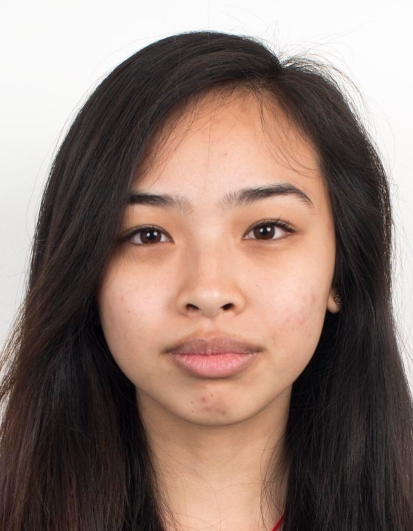

In [1]:
import os
import io
import pillow_avif
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
from IPython.display import display, Markdown

SAMPLE_FILE = "original.jpg"
original = Image.open(SAMPLE_FILE)

print(f"Size (bytes):\t{os.stat(SAMPLE_FILE).st_size}")
print(f"Size (pixels):\t{original.size}")
print(f"Format:\t\t{original.format_description}")
display(original)  

# Reducing the image size: downscaling, grayscale and compressing 
A first step towards reducing the size of the image is to only use one single channel. Then we need to find the right compromise between downscaling and compression.

We will test JPEG, WEBP and JPEG2000 compression algorithms with different quality and scaling combinations.

In [2]:
def print_matrix(img, scale, quality, format, scale_label="Scale", quality_label="Quality", color=False):
    f, axarr = plt.subplots(len(scale) + 1, len(quality) + 1, figsize=(40, 30))
    f.suptitle(f"{format} ({"color" if color else "grayscale"})", fontsize=60)
    plt.tight_layout()
    axarr[0, 0].text(0.5, 0.5, f"{quality_label} →\n\n\n{scale_label} ↓", ha='center', va='center', fontsize=26) 
    axarr[0, 0].axis('off')
    
    for i, s in enumerate(scale):
        axarr[i+1, 0].text(0.5, 0.5, f"{int(s*100)}%", ha='center', va='center', fontsize=26) 
        axarr[i+1, 0].axis('off')
        
        for j, q in enumerate(quality):
            if i == 0:
                axarr[0, j+1].text(0.5, 0.5, f"{q}", ha='center', va='center', fontsize=26) 
                axarr[0, j+1].axis('off')
            
            buffer = io.BytesIO()
            img = original
            if not color:
                img = img.convert('L')
            img = img.resize((int(x*s) for x in img.size))
            img.save(buffer, format, optimize=True, quality=q, quality_layers=[q])
            axarr[i+1 ,j+1].imshow(Image.open(buffer), cmap='gray', vmin=0, vmax=255)
            axarr[i+1, j+1].axis('off')
            axarr[i+1, j+1].set_title(f"{buffer.getbuffer().nbytes} bytes")
    filename = f"img_out/{format}_{"color" if color else "grayscale"}.png"
    plt.savefig(filename) 
    plt.close() # avoid showing the plot here
    display(Markdown(f"[{filename}](./{filename}) saved!"))

# JPEG compression

In [3]:
scale = [1, .75, .5, .375, .25]
quality = [100, 90, 80, 70, 60, 50, 40, 30, 20, 10]
print_matrix(original, scale, quality, 'JPEG')
print_matrix(original, scale, quality, 'JPEG', color=True)

[img_out/JPEG_grayscale.png](./img_out/JPEG_grayscale.png) saved!

[img_out/JPEG_color.png](./img_out/JPEG_color.png) saved!

# WEBP compression

In [4]:
scale = [1, .75, .5, .375, .25]
quality = [100, 90, 80, 70, 60, 50, 40, 30, 20, 10]
print_matrix(original, scale, quality, 'WEBP')
print_matrix(original, scale, quality, 'WEBP', color=True)

[img_out/WEBP_grayscale.png](./img_out/WEBP_grayscale.png) saved!

[img_out/WEBP_color.png](./img_out/WEBP_color.png) saved!

# JPEG2000 compression

In [5]:
scale = [1, .75, .5, .25]
quality = [1, 2, 5, 7.5, 10, 20, 35, 50, 75, 100]
print_matrix(original, scale, quality, 'JPEG2000', quality_label="Quality rate")
print_matrix(original, scale, quality, 'JPEG2000', quality_label="Quality rate", color=True)

[img_out/JPEG2000_grayscale.png](./img_out/JPEG2000_grayscale.png) saved!

[img_out/JPEG2000_color.png](./img_out/JPEG2000_color.png) saved!

# AVIF compression

In [6]:
scale = [1, .75, .5, .375, .25]
quality = [100, 90, 80, 70, 60, 50, 40, 30, 20, 10]
print_matrix(original, scale, quality, 'AVIF')
print_matrix(original, scale, quality, 'AVIF', color=True)

[img_out/AVIF_grayscale.png](./img_out/AVIF_grayscale.png) saved!

[img_out/AVIF_color.png](./img_out/AVIF_color.png) saved!